# Week2授業課題2 富士下山問題

## 【問題1】データの可視化

In [393]:
import numpy as np
csv_path = "mtfuji_data.csv" # ファイル名（パス）を指定する
np.set_printoptions(suppress=True) # 指数表示の禁止を設定する
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)

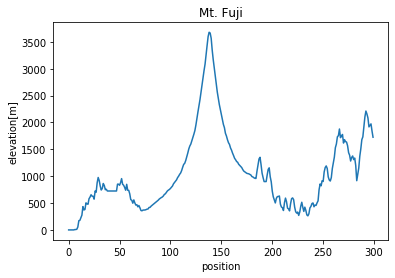

In [394]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.xlabel("position")
plt.ylabel("elevation[m]")
plt.title("Mt. Fuji")
plt.plot(fuji[:,0], fuji[:,3], label="Mt. Fuji")
plt.show()

## 【問題2】ある地点の勾配を計算する関数を作成

In [395]:
def calc_gradient(point):
    position = fuji[:,0]
    elevation =  fuji[:,3]
    x_sa = position[point] - position[point - 1]
    y_sa = elevation[point] - elevation[point - 1]
    grad = y_sa / x_sa
    return grad
    
calc_gradient(136)

168.35000000000036

## 【問題3】移動先の地点を計算する関数を作成

In [396]:
from decimal import Decimal, ROUND_HALF_UP, ROUND_HALF_EVEN

def calc_next_point(now,alpha = 0.2):
    grad = calc_gradient(now)
    next_point = now - alpha*grad
    #return next 0以下、299以上はカット
    if next_point > 299:
        next_point = 299
    elif next_point < 0:
        next_point = 0
    
    return int(Decimal(next_point).quantize(Decimal('0'), rounding=ROUND_HALF_UP))

point = calc_next_point(136)
print("136の次の移動先は{}です。".format(point))

136の次の移動先は102です。


## 【問題4】山を下る関数を作成

In [397]:
def down_mountain(now_point, alpha=0.2):
    move_list = [now_point]
    
    for i in range(len(fuji)):
        move = calc_next_point(move_list[-1], alpha)
        move_list.append(move)
        
        if move_list[-1] in move_list[:-1]:
            return move_list
    return move_list

In [398]:
# 136の場合
down_mountain_list = down_mountain(136, 0.2)
down_mountain_list

[136, 102, 98, 95, 93, 89, 85, 82, 79, 73, 70, 78, 77, 75, 75]

## 【問題5】下山過程の可視化

In [399]:
def plot_graph():
    import matplotlib.pyplot as plt
    %matplotlib inline
    plt.xlabel("position")
    plt.ylabel("elevation[m]")
    plt.title("Mt. Fuji")
    plt.plot(fuji[:,0], fuji[:,3], label="Mt. Fuji")
    plt.scatter(down_mountain_list, fuji[:,3][down_mountain_list], c="r") #断面図の中に移動した地点を点で表示
    plt.show()

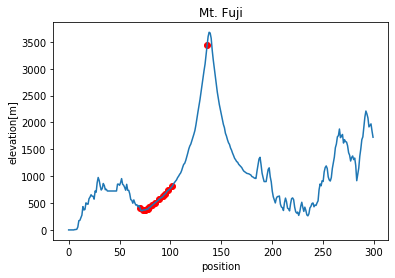

In [400]:
plot_graph()

## 【問題6】初期値の変更

### 全ての地点で計算

In [401]:
for i in range(len(fuji)):
    print(down_mountain(i))

[0, 0]
[1, 1]
[2, 2]
[3, 3]
[4, 4]
[5, 5]
[6, 5, 5]
[7, 7]
[8, 7, 7]
[9, 1, 1]
[10, 0, 0]
[11, 10, 0, 0]
[12, 2, 2]
[13, 4, 4]
[14, 0, 0]
[15, 27, 31, 51, 41, 41]
[16, 14, 0, 0]
[17, 0, 0]
[18, 22, 13, 4, 4]
[19, 21, 15, 27, 31, 51, 41, 41]
[20, 0, 0]
[21, 15, 27, 31, 51, 41, 41]
[22, 13, 4, 4]
[23, 28, 0, 0]
[24, 24]
[25, 36, 52, 37, 35, 43, 43]
[26, 0, 0]
[27, 31, 51, 41, 41]
[28, 0, 0]
[29, 10, 0, 0]
[30, 41, 41]
[31, 51, 41, 41]
[32, 47, 47]
[33, 27, 31, 51, 41, 41]
[34, 15, 27, 31, 51, 41, 41]
[35, 43, 43]
[36, 52, 37, 35, 43, 43]
[37, 35, 43, 43]
[38, 44, 44]
[39, 39]
[40, 40]
[41, 41]
[42, 42]
[43, 43]
[44, 44]
[45, 45]
[46, 46]
[47, 47]
[48, 22, 13, 4, 4]
[49, 49]
[50, 54, 58, 80, 80]
[51, 41, 41]
[52, 37, 35, 43, 43]
[53, 74, 74]
[54, 58, 80, 80]
[55, 63, 74, 74]
[56, 66, 74, 74]
[57, 35, 43, 43]
[58, 80, 80]
[59, 59]
[60, 73, 70, 78, 77, 75, 75]
[61, 83, 80, 80]
[62, 64, 52, 37, 35, 43, 43]
[63, 74, 74]
[64, 52, 37, 35, 43, 43]
[65, 76, 75, 75]
[66, 74, 74]
[67, 66, 74, 74]
[

### 初期値が150の場合

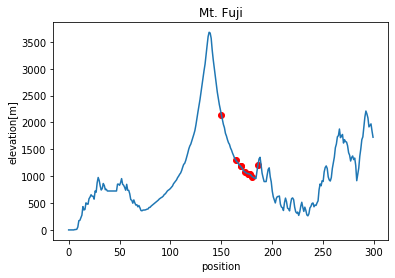

In [402]:
down_mountain_list = down_mountain(150)
plot_graph()

## 初期値が250の場合

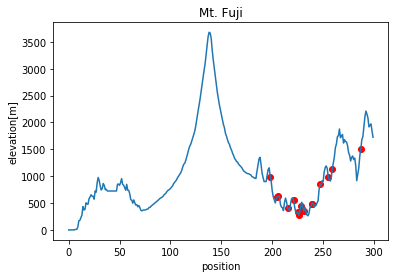

In [406]:
down_mountain_list = down_mountain(255)
plot_graph()

## 【問題7】（アドバンス問題）ハイパーパラメータの変更

### 初期値136、ハイパーパラメータ0.1〜0.5

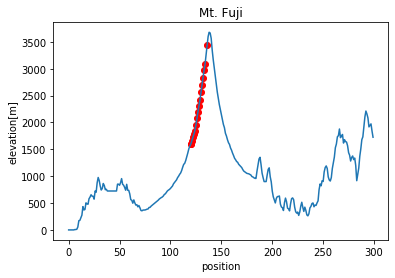

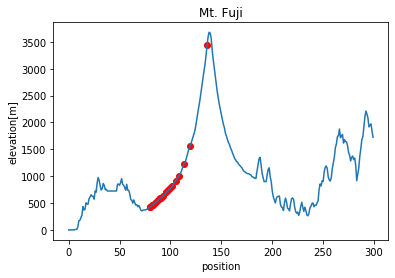

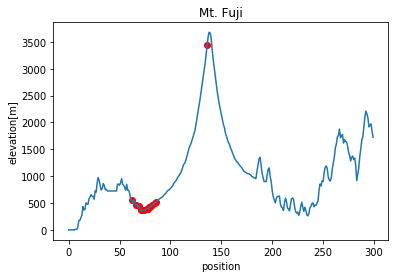

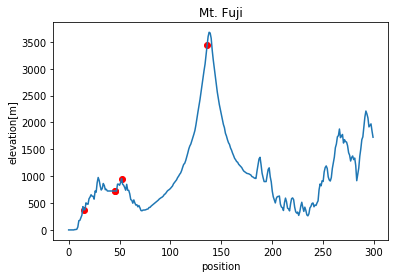

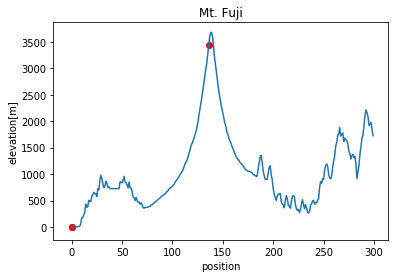

In [405]:
down_mountain_list = down_mountain(136, 0.01)
plot_graph()
down_mountain_list = down_mountain(136, 0.1)
plot_graph()
down_mountain_list = down_mountain(136, 0.3)
plot_graph()
down_mountain_list = down_mountain(136, 0.5)
plot_graph()
down_mountain_list = down_mountain(136, 1)
plot_graph()

*考察*   
ハイパーパラメータを大きいと下山距離が拡大し、小さいと下山距離が縮小する